In [21]:
import pandas as pd

In [22]:
df= pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


### Data Cleaning

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [24]:
df.sex.value_counts()

,count
sex,
male,517
female,503
M,64
man,64
F,62
woman,62


In [25]:
df.smoker.value_counts()

,count
smoker,
no,1013
yes,259


In [26]:
def clean_df(df):
  df.drop_duplicates(inplace=True)
  df.dropna(inplace=True)
  sex_map ={'male':'M', 'man':'M', 'female':'F', 'woman':'F'}
  df.sex= df.sex.replace(sex_map)
  df.region= df.region.str.lower()


  for col in ['age', 'children']:
    if col in df.columns:
      df[col]= pd.to_numeric(df[col], errors='coerce')
      df[col]=df[col].abs().astype('int')
  df.dropna(inplace=True)
  return df

df_clean= clean_df(df)
df_clean.head()



,age,sex,bmi,children,smoker,region,charges
0,19,F,27.900,0,yes,southwest,16884.924
1,18,M,33.770,1,no,southeast,1725.5523
2,28,M,33.000,3,no,southeast,$4449.462
3,33,M,22.705,0,no,northwest,$21984.47061
4,32,M,28.880,0,no,northwest,$3866.8552


In [27]:
df.charges= df.charges.str.replace('$', '', regex=False).astype(float)
df.dropna(inplace=True)

In [28]:
df.isna().any(axis=1).sum()

np.int64(0)

### Exploratory Data Analysis (EDA)

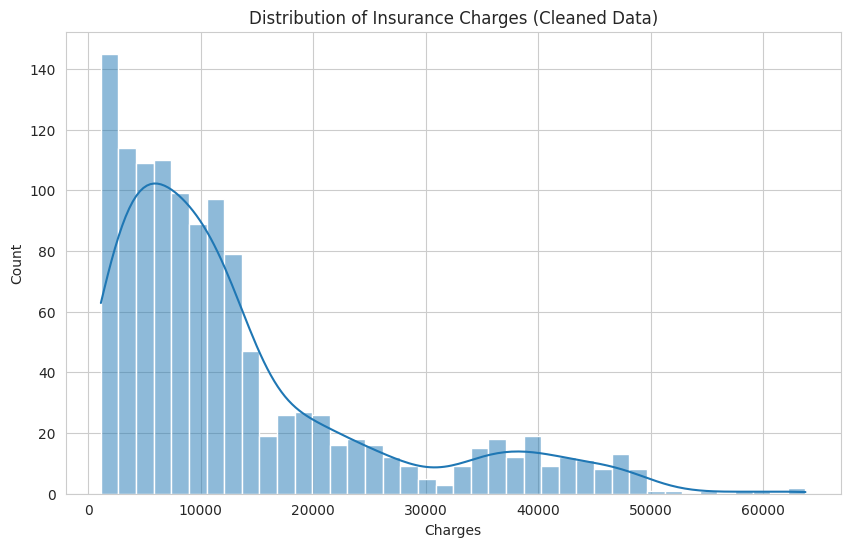

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=40)
plt.title('Distribution of Insurance Charges (Cleaned Data)')
plt.xlabel('Charges')
plt.show()

<Axes: ylabel='bmi'>

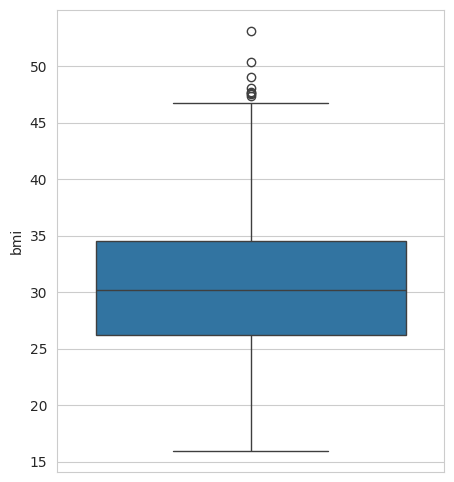

In [30]:
sns.set_style('whitegrid')

plt.figure(figsize=(5, 6))
sns.boxplot(df.bmi)

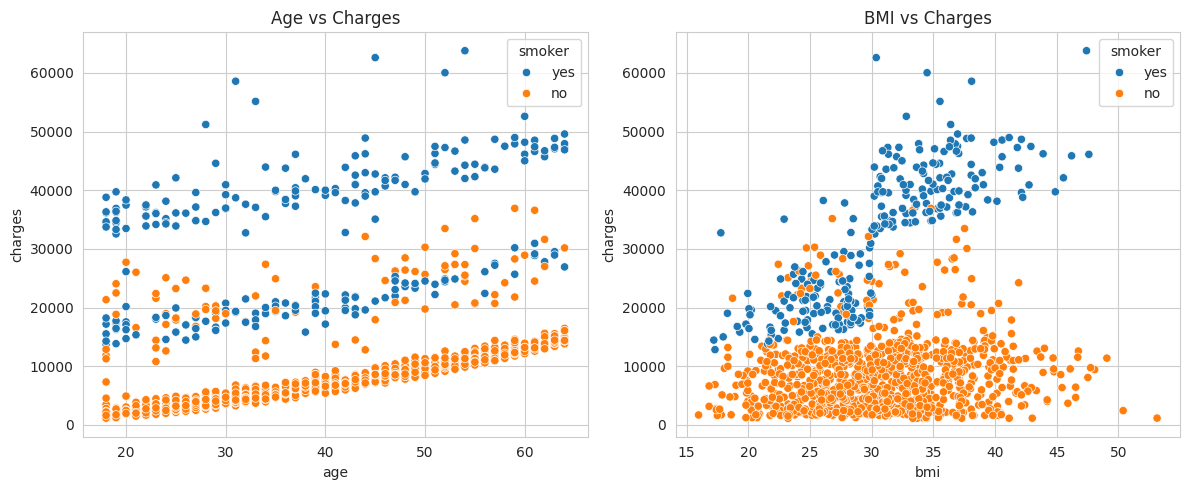

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='age', y='charges', data=df, hue='smoker', ax=axes[0])
axes[0].set_title("Age vs Charges")

sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', ax=axes[1])
axes[1].set_title("BMI vs Charges")

plt.tight_layout()
plt.show()

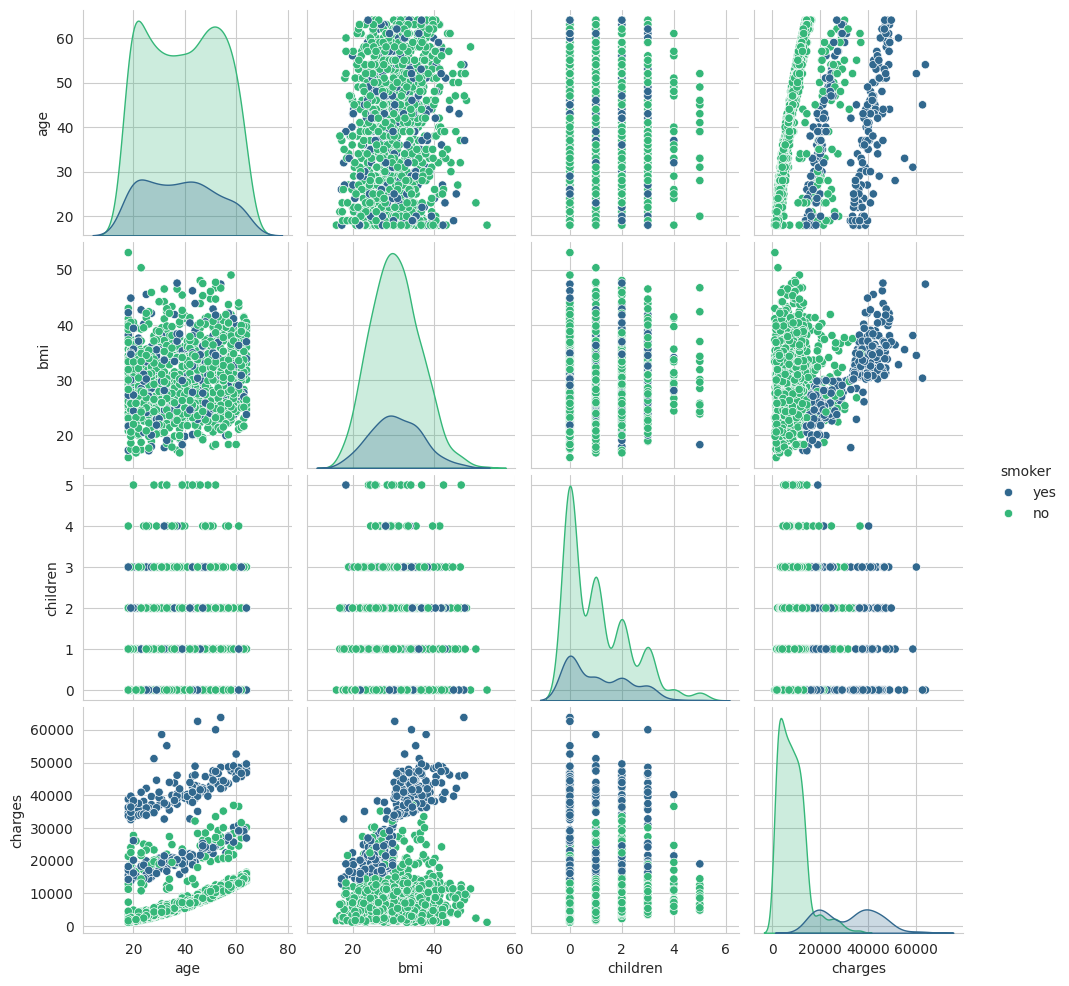

In [32]:
sns.pairplot(df, hue='smoker', palette='viridis')
plt.show()

### Feature Engineering (Converting Categorical Data to Numbers)

In [33]:
df.sex= df.sex.map({'M':1, 'F':0})
df.smoker= df.smoker.map({'yes':1, 'no':0})
df = pd.get_dummies(df, columns=['region'], drop_first=True).astype(int)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1207 non-null   int64
 1   sex               1207 non-null   int64
 2   bmi               1207 non-null   int64
 3   children          1207 non-null   int64
 4   smoker            1207 non-null   int64
 5   charges           1207 non-null   int64
 6   region_northwest  1207 non-null   int64
 7   region_southeast  1207 non-null   int64
 8   region_southwest  1207 non-null   int64
dtypes: int64(9)
memory usage: 94.3 KB


In [35]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,-0.011715,0.117666,0.059875,-0.038086,0.291876,-0.000955,-0.005224,0.016180
sex,-0.011715,1.000000,0.030041,0.014962,0.074866,0.051081,0.003589,0.004649,-0.009971
bmi,0.117666,0.030041,1.000000,0.016754,0.005693,0.197667,-0.126662,0.261431,-0.000344
children,0.059875,0.014962,0.016754,1.000000,0.007335,0.071257,0.023805,-0.015904,0.000973
smoker,-0.038086,0.074866,0.005693,0.007335,1.000000,0.785996,-0.040164,0.060539,-0.028679
charges,0.291876,0.051081,0.197667,0.071257,0.785996,1.000000,-0.041351,0.072183,-0.034726
region_northwest,-0.000955,0.003589,-0.126662,0.023805,-0.040164,-0.041351,1.000000,-0.341565,-0.324187
region_southeast,-0.005224,0.004649,0.261431,-0.015904,0.060539,0.072183,-0.341565,1.000000,-0.343869
region_southwest,0.016180,-0.009971,-0.000344,0.000973,-0.028679,-0.034726,-0.324187,-0.343869,1.000000


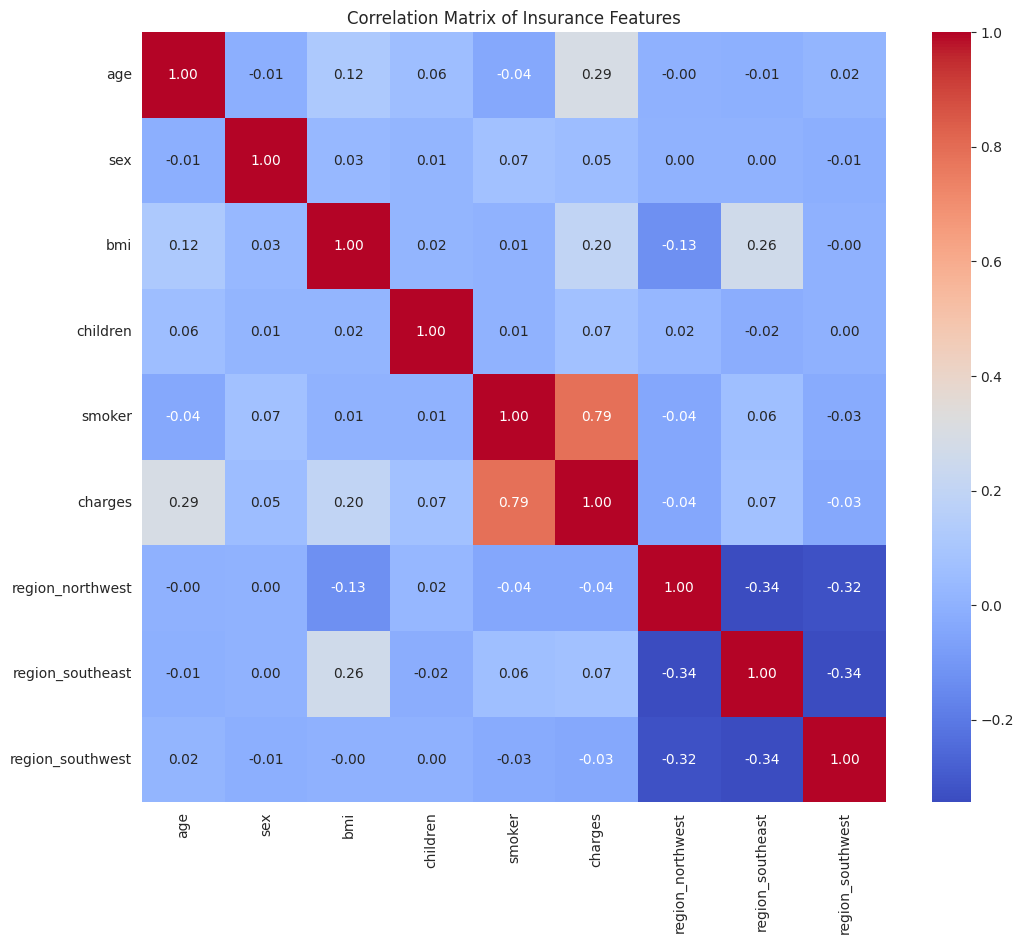

In [36]:
correlation_matrix = df.corr()

# 2. Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Matrix of Insurance Features')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['age', 'bmi', 'children']
scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# --- 1. Linear Regression Model ---
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# --- 2. Random Forest Regressor Model ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# --- 3. Evaluate Performance ---
lr_r2 = r2_score(y_test, lr_preds)
lr_mae = mean_absolute_error(y_test, lr_preds)

rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)

print("--- Linear Regression Performance ---")
print(f"R-squared (R²): {lr_r2:.4f}")
print(f"Mean Absolute Error (MAE): ${lr_mae:,.2f}\n")

print("--- Random Forest Performance ---")
print(f"R-squared (R²): {rf_r2:.4f}")
print(f"Mean Absolute Error (MAE): ${rf_mae:,.2f}")

--- Linear Regression Performance ---
R-squared (R²): 0.7049
Mean Absolute Error (MAE): $4,375.42

--- Random Forest Performance ---
R-squared (R²): 0.8153
Mean Absolute Error (MAE): $2,896.55


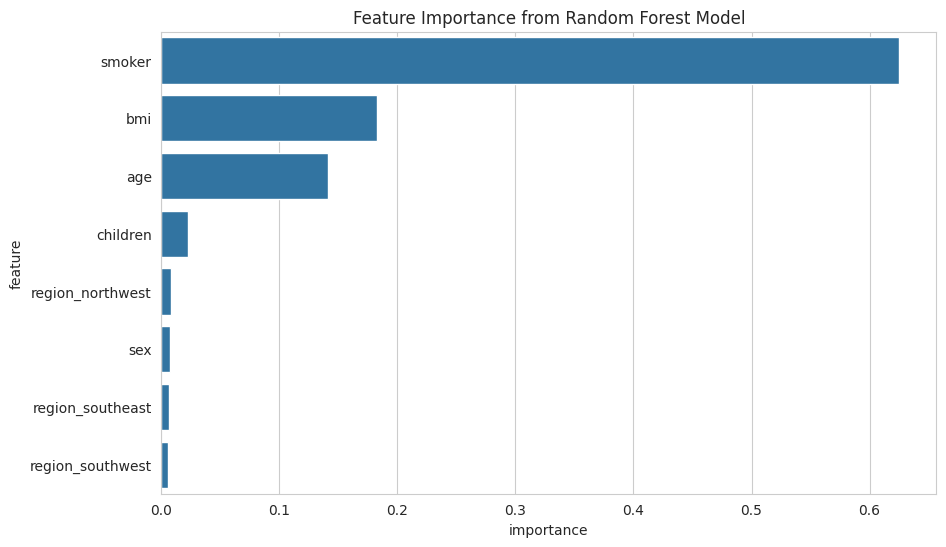

In [39]:
importances = rf.feature_importances_
feature_names = X_train.columns


feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.show()

### Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# --- Step 1: Define the settings we want to try ---
# We'll test a few options for the number of trees and the depth of each tree.
param_grid = {
    'n_estimators': [100, 200],  # How many trees to build
    'max_depth': [10, 20, None]  # How deep each tree can be
}

# --- Step 2: Set up the automated search ---
# This creates the "tuner" that will test all the combinations.
# cv=3 means it will use 3-fold cross-validation to make sure the results are stable.
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# --- Step 3: Run the search on training data ---
# This is the part that might take a minute or two.
print("Starting the search for the best model settings...")
grid_search.fit(X_train, y_train)

# --- Step 4: See the results ---
print("\nSearch complete!")
print(f"The best settings found are: {grid_search.best_params_}")
print(f"The best R² score on the training data was: {grid_search.best_score_:.4f}")

# --- Step 5: Check performance on the test data ---
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_r2 = r2_score(y_test, test_predictions)
print(f"\nThe R² score of the fine-tuned model on the test set is: {test_r2:.4f}")

Starting the search for the best model settings...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Search complete!
The best settings found are: {'max_depth': 10, 'n_estimators': 100}
The best R² score on the training data was: 0.8368

The R² score of the fine-tuned model on the test set is: 0.8180


####  The fact that scores are very close (83.7% vs 81.8%) is an excellent sign. It means model is not overfitting.

In [41]:
from sklearn.model_selection import GridSearchCV

# 1. Define a more detailed parameter grid around previous best results
param_grid_refined = {
    'n_estimators': [80, 100, 150],
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

# 2. Set up and run the new Grid Search
grid_search_refined = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_refined,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1
)

print("Starting the refined search...")
grid_search_refined.fit(X_train, y_train)

# 3. Check the best results from the new search
print("\nRefined search complete!")
print(f"The new best settings are: {grid_search_refined.best_params_}")
print(f"The new best cross-validated R² score is: {grid_search_refined.best_score_:.4f}")

# 4. Evaluate on the test set
best_model_refined = grid_search_refined.best_estimator_
test_predictions_refined = best_model_refined.predict(X_test)
test_r2_refined = r2_score(y_test, test_predictions_refined)
print(f"\nThe R² score of the new fine-tuned model on the test set is: {test_r2_refined:.4f}")

Starting the refined search...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Refined search complete!
The new best settings are: {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 100}
The new best cross-validated R² score is: 0.8535

The R² score of the new fine-tuned model on the test set is: 0.8391


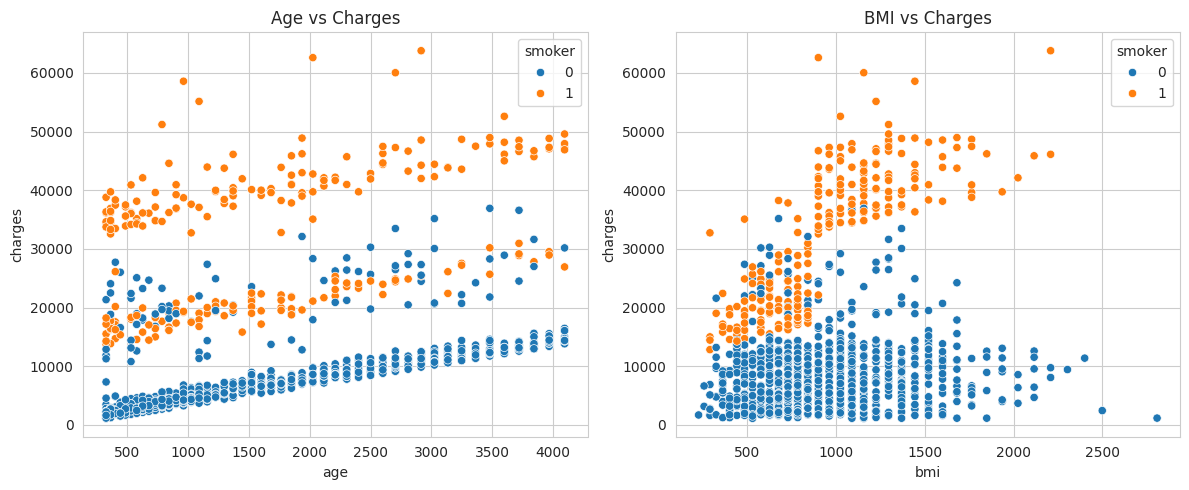

In [42]:
#just an experiment

import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=df.age**2, y=df.charges, hue=df.smoker, ax=axes[0])
axes[0].set_title("Age vs Charges")

sns.scatterplot(x=df.bmi**2, y=df.charges, hue= df.smoker, ax=axes[1] )
axes[1].set_title("BMI vs Charges")
plt.tight_layout()
plt.show()

### Predicting new charges

In [43]:
val_df= pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/validation_dataset.csv')
val= val_df.copy()
val.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [44]:
clean_df(val).head()

,age,sex,bmi,children,smoker,region
0,18,F,24.090000,1,no,southeast
1,39,M,26.410000,0,yes,northeast
2,27,M,29.150000,0,yes,southeast
3,71,M,65.502135,13,yes,southeast
4,28,M,38.060000,0,no,southeast


In [47]:
val.sex=val.sex.map({'M':1, 'F':0})
val.smoker= val.smoker.map({'yes':1, 'no':0})
val = pd.get_dummies(val, columns=['region'], drop_first=True).astype(int)
val.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,18,0,24,1,0,0,1,0
1,39,1,26,0,1,0,0,0
2,27,1,29,0,1,0,1,0
3,71,1,65,13,1,0,1,0
4,28,1,38,0,0,0,1,0


In [48]:
val.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,18,0,24,1,0,0,1,0
1,39,1,26,0,1,0,0,0
2,27,1,29,0,1,0,1,0
3,71,1,65,13,1,0,1,0
4,28,1,38,0,0,0,1,0


In [52]:
#Align Columns to Match the Training Data
X_train_columns = X_train.columns
val_processed = val.reindex(columns=X_train_columns, fill_value=0)

#Scale the Numerical Features
numerical_features = ['age', 'bmi', 'children']
val_processed[numerical_features] = scaler.transform(val_processed[numerical_features])

In [53]:
best_model = grid_search_refined.best_estimator_
final_predictions = best_model.predict(val_processed)

In [54]:
val_df['predicted_charges'] = final_predictions
val_df.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,5438.996023
1,39.0,male,26.410000,0.0,yes,northeast,20266.455272
2,27.0,male,29.150000,0.0,yes,southeast,21583.837347
3,71.0,male,65.502135,13.0,yes,southeast,45255.419972
4,28.0,male,38.060000,0.0,no,southeast,5434.847201
